In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [91]:
def display_data(X, example_width=None):
    m, n = X.shape

    # Set example_width automatically if not passed in
    if example_width == None:
        example_width = np.round(np.sqrt(n)).astype(int)
    
    # Compute rows, cols
    example_height = (n / example_width).astype(int)

    # Compute number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                               pad + display_rows * (example_height + pad)))
    
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            
            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, :]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          X[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1
        if curr_ex >= m:
            break
    
    # Display Image
    plt.figure()
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [51]:
def sigmoid(z: np.ndarray):
    return 1 / (1 + np.exp(-z))

In [52]:
def lr_cost_function(theta: np.ndarray, X: np.ndarray, y: np.ndarray, lmd):
    # Initialize some useful values
    m = y.size

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #

    hypothesis = sigmoid(np.dot(X, theta))
    reg_theta = theta[1:]
    J = -np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis)) / m + lmd / (2 * m) * np.dot(reg_theta.T, reg_theta)
    grad = np.dot(hypothesis - y, X) / m
    grad[1:] = grad[1:] + lmd / m * reg_theta

    # =========================================================

    return J, grad

In [53]:
def one_vs_all(X: np.ndarray, y: np.ndarray, num_labels, lmd):
    # Some useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.c_[np.ones(m), X]

    # ===================== Your Code Here =====================
    # Instructions : You should complete the following code to train num_labels
    #                logistic regression classifiers with regularization
    #                parameter lambda

    for iclass in range(1, num_labels + 1):
        init_theta = np.zeros(n + 1)
        y_i = np.array([1 if j == iclass else 0 for j in y])

        def cost_func(t):
            return lr_cost_function(t, X, y_i, lmd)[0]
        
        def grad_func(t):
            return lr_cost_function(t, X, y_i, lmd)[1]

        all_theta[iclass - 1], *unused = opt.fmin_cg(f=cost_func, fprime=grad_func, x0=init_theta, maxiter=50, disp=False, full_output=True)

    # =========================================================

    return all_theta

In [82]:
def predict(theta1: np.ndarray, theta2: np.ndarray, X: np.ndarray):
    # Useful values
    m = X.shape[0]
    num_labels = theta2.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned neural network. You should set p to a
    #                1-D array containing labels between 1 to num_labels.
    #
    # Hint : the max function blah blah
    
    X = np.c_[np.ones(m), X]
    a1 = sigmoid(np.dot(X, theta1.T))
    a1 = np.c_[np.ones(a1.shape[0]), a1]
    a2 = sigmoid(np.dot(a1, theta2.T))
    p = np.argmax(a2, axis=1) + 1

    # =========================================================

    return p

In [55]:
def predict_one_vs_all(all_theta: np.ndarray, X: np.ndarray):
    m, _ = X.shape
    num_labels, _ = all_theta.shape

    # You need to return the following variables correctly
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.c_[np.ones(m), X]

    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned logistic regression parameters (one vs all).
    #                You should set p to a vector of predictions (from 1 to
    #                num_labels)
    #
    # Hint : This code can be done all vectorized using the max function
    #        In particular, the max function can also return the index of the
    #        max element, for more information see 'np.argmax' function.
    
    result = np.dot(all_theta, X.T)
    p = np.argmax(result, axis=0)

    # ===========================================================

    return p

# ex3

In [56]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400 # 20x20 input images of Digits
num_labels = 10

## Part 1: Loading and Visualizing Data

In [57]:
import scipy.io as scio

In [58]:
# Load Training Data
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_3/ex3data1.mat')

In [59]:
X = data['X']
y = data['y'].flatten()
m = y.size

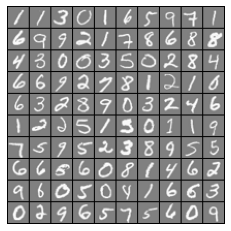

In [60]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100], :]

display_data(sel)

## Part 2a: Vectorize Logistic Regression

In [61]:
# Test case for lrCostFunction
theta_t = np.array([-2, -1, 1, 2])

X_t = np.c_[np.ones(5), np.arange(1, 16).reshape((3, 5)).T / 10]
y_t = np.array([1, 0, 1, 0, 1])

lambda_t = 3

In [62]:
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)

np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
print('Cost: {:0.7f}'.format(J))
print('Expected cost: 2.534819')
print('Gradients:\n{}'.format(grad))
print('Expected gradients:\n[ 0.146561 -0.548558 0.724722 1.398003]')

Cost: 2.5348194
Expected cost: 2.534819
Gradients:
[ 0.146561 -0.548558  0.724722  1.398003]
Expected gradients:
[ 0.146561 -0.548558 0.724722 1.398003]


## Part 2b: One-vs-All Training

In [63]:
print('Training One-vs-All Logistic Regression...')
lmd = 0.1
all_theta = one_vs_all(X, y, num_labels, lmd)

Training One-vs-All Logistic Regression...


In [64]:
all_theta.shape

(10, 401)

## Part 3: Predict for One-Vs-All

In [65]:
pred = predict_one_vs_all(all_theta, X)

print('Training set accuracy: {}'.format(np.mean(pred == y)*100))

Training set accuracy: 0.27999999999999997


# ex3_nn

In [66]:
# Setup the parameters you will use for this exercise
input_layer_size = 400  # 20x20 input images of Digits
hidden_layer_size = 25  # 25 hidden layers
num_labels = 10

## Part 1: Loading and Visualizing Data

In [68]:
# Load Training Data
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_3/ex3data1.mat')

X = data['X']
y = data['y'].flatten()
m = y.size

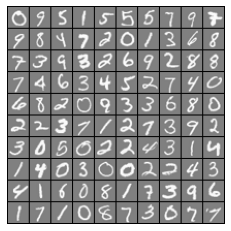

In [69]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100], :]

display_data(sel)

## Part 2: Loading Parameters

In [70]:
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_3/ex3weights.mat')
theta1 = data['Theta1']
theta2 = data['Theta2']

In [74]:
print(X.shape)
print(theta1.shape)
print(theta2.shape)

(5000, 400)
(25, 401)
(10, 26)


## Part 3: Implement Predict

In [83]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {}'.format(np.mean(pred == y)*100))

Training set accuracy: 97.52


(400,)

Displaying Example Image


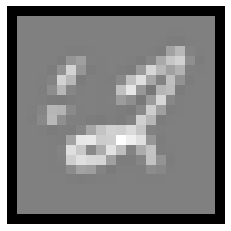

Neural network prediction: [2] (digit [2])
Paused - press ENTER to continue, q + ENTER to exit: 
Displaying Example Image


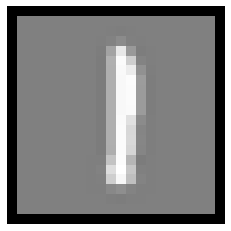

Neural network prediction: [1] (digit [1])
Paused - press ENTER to continue, q + ENTER to exit: 
Displaying Example Image


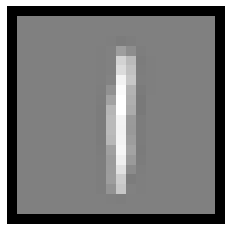

Neural network prediction: [1] (digit [1])
Paused - press ENTER to continue, q + ENTER to exit: 
Displaying Example Image


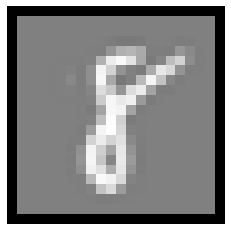

Neural network prediction: [8] (digit [8])
Paused - press ENTER to continue, q + ENTER to exit: q


In [92]:
# Randomly permute examples
rp = np.random.permutation(m)

for i in range(m):
    print('Displaying Example Image')
    sel = X[rp[i]]
    sel = sel.reshape((1, sel.size))
    display_data(sel)
    pred = predict(theta1, theta2, sel)
    print('Neural network prediction: {} (digit {})'.format(pred, np.mod(pred, 10)))
    s = input('Paused - press ENTER to continue, q + ENTER to exit: ')
    if s == 'q':
        break